## Filling the missing data and tranforming categorical data with scikit learn

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
car_sales_missing = pd.read_csv("DATA/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


<AxesSubplot:>

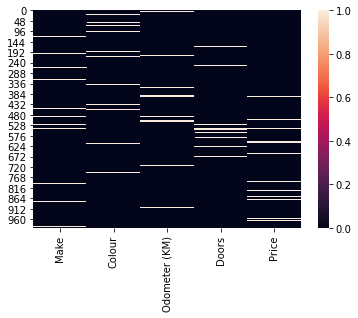

In [13]:
sns.heatmap(car_sales_missing.isnull())

In [14]:
car_sales_missing.value_counts()

Make    Colour  Odometer (KM)  Doors  Price  
Toyota  White   248815.0       4.0    9785.0     1
Honda   White   171260.0       4.0    18524.0    1
                95579.0        4.0    11135.0    1
                95481.0        4.0    8687.0     1
                92883.0        4.0    14931.0    1
                                                ..
Toyota  Blue    51155.0        4.0    15960.0    1
                48684.0        4.0    33817.0    1
                44815.0        4.0    8460.0     1
                42480.0        4.0    19720.0    1
BMW     Black   11049.0        3.0    19500.0    1
Length: 773, dtype: int64

In [15]:
## Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [16]:
# Split into X and Y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [17]:
y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

## Split into X and Y

In [56]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [19]:
print(f'{X_train.shape} {y_train.shape}')

(760, 4) (760,)


## Filling missing values with SKlearn

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical Values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy = 'constant',fill_value = 'missing')
door_imputer = SimpleImputer(strategy = 'constant',fill_value = 4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create  an imputer (Something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer',cat_imputer,cat_features),
    ('door_imputer',door_imputer,door_features),
    ('num_imputer',num_imputer,num_features)
])

# Transform the data
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.fit_transform(X_test)

In [25]:
# filled_X_train

In [26]:
# filled_X_test

In [34]:
car_sales_filled_X_train = pd.DataFrame(filled_X_train,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled_X_train

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,71934
1,Toyota,Red,4,162665
2,Honda,White,4,42844
3,Honda,White,4,195829
4,Honda,Blue,4,219217
...,...,...,...,...
755,Toyota,missing,4,218803
756,BMW,Blue,5,245427
757,Toyota,White,4,196225
758,Honda,Blue,4,133117


In [35]:
car_sales_filled_X_test = pd.DataFrame(filled_X_test,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled_X_test

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Blue,4,99761
1,Toyota,Black,4,17975
2,Honda,Blue,4,197664
3,Nissan,Green,4,235589
4,Honda,Black,4,231659
...,...,...,...,...
185,Honda,Green,4,165101
186,Nissan,Green,3,153554
187,Toyota,White,4,108569
188,BMW,Black,3,201190


<AxesSubplot:>

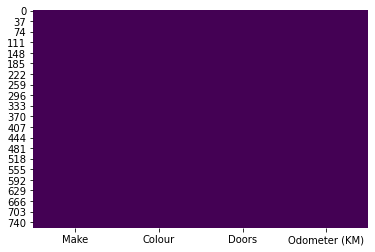

In [41]:
sns.heatmap(car_sales_filled_X_train.isna(),cmap='viridis',cbar=False)

<AxesSubplot:>

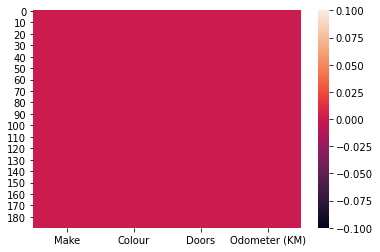

In [39]:
sns.heatmap(car_sales_filled_X_test.isna())

## Let us one hot encode

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                      one_hot,
                      categorical_features)],
                      remainder='passthrough')

#Fill train and test set seperately
transformed_X_train = transformer.fit_transform(car_sales_filled_X_train)
transformed_X_test = transformer.fit_transform(car_sales_filled_X_test)

In [50]:
k = pd.DataFrame(transformed_X_train.toarray())
k

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,71934.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,162665.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,42844.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,195829.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,219217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,218803.0
756,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,245427.0
757,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,196225.0
758,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,133117.0


In [59]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
regressor.fit(transformed_X_train, y_train)


RandomForestRegressor()

In [60]:
regressor.score(transformed_X_test,y_test)

0.25366332156443805

In [62]:
predictions = model.predict(transformed_X_test)

In [63]:
predictions

array([17594.47      , 22879.43      , 11788.97      ,  9560.33      ,
       11211.87      , 11249.24      , 15691.54      , 10630.69      ,
       18072.94      , 12856.68666667,  8295.47      , 15341.97      ,
        8619.08      , 10529.43      , 13474.78      , 19697.89      ,
       15842.56      ,  7368.36      ,  9968.59      , 14407.47      ,
       12146.58      , 18153.61916667, 17860.8       , 27249.83      ,
        9536.05753571, 19702.42      , 12865.49      ,  8044.63      ,
       19258.18      , 18559.54      , 12658.96      , 14387.11      ,
       10667.93      , 14255.71      , 29222.9       , 14953.        ,
       12285.21      , 12177.88      , 21847.4       , 10050.29      ,
       15800.59      , 20422.54      , 25525.43      , 15120.92      ,
       15507.34266667, 11400.12      , 14661.26      ,  8970.33      ,
       15550.07      , 12894.31      , 11072.33      , 20790.03      ,
       15429.54      ,  5967.81      , 13007.42      ,  8837.44      ,
      

In [69]:
from sklearn import metrics
mae = print(f'mae {metrics.mean_absolute_error(y_test,predictions)}')
mse = print('mse:',metrics.mean_squared_error(y_test,predictions))
rmse = print('rmse',np.sqrt(metrics.mean_squared_error(y_test,predictions)))


mae 5656.811900501253
mse: 49974474.87444854
rmse 7069.262682518492


In [70]:
! git add Car_Preprocessing_using_sklearn.ipynb
! git commit -m "13:02/03-07-2021"
! git push origin main

fatal: pathspec 'Car_Preprocessing_using_sklearn' did not match any files


On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../Matplotlib/Matplotlib_intro.ipynb
	modified:   ../Numpy/Numpy_intro.ipynb
	modified:   ../Pandas/Intro_pandas.ipynb
	modified:   SkLearn_Intro.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../.virtual_documents/
	../Matplotlib/.ipynb_checkpoints/
	../Matplotlib/car-sales-missing-data.csv
	../Matplotlib/car-sales.csv
	../Matplotlib/sample.png
	../Numpy/.ipynb_checkpoints/
	../Pandas/.ipynb_checkpoints/
	.ipynb_checkpoints/
	Car_Preprocessing.ipynb
	Car_Preprocessing_using_sklearn.ipynb
	DATA/car-sales-extended-missing-data.csv
	DATA/car-sales-extended.csv
	DATA/car-sales-missing-data.csv
	random_forest_model_1.pkl
	../kite_tutorial-checkpoint.ipynb

no changes added to commit (use "git add" and/or "git com

Everything up-to-date
